# Model Analysis

In [1]:
#Importamos librerías necesarias

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward

In [2]:
# Only run if you are in Colab and after you change the dir of the files

from google.colab import drive
drive.mount('/content/drive/')

FAKE_DIR = '/content/drive/Shareddrives/Talleres y archivos/Ver+/A3/datasets/Fake.csv'
TRUE_DIR = '/content/drive/Shareddrives/Talleres y archivos/Ver+/A3/datasets/True.csv'
IOP_DIR = '/content/drive/Shareddrives/Talleres y archivos/Ver+/A3/datasets/fake_and_real_news_dataset.csv'

Mounted at /content/drive/


In [3]:
#Other datasets
raw_fake_csv = pd.read_csv(FAKE_DIR)
raw_true_csv = pd.read_csv(TRUE_DIR)

#Dataset used
raw_iop_csv = pd.read_csv(IOP_DIR)

In [4]:
raw_iop_csv

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
...,...,...,...,...
4589,ukZm6JTO#x,Russia Calls the War Party's Bluff,License DMCA \nCold War 2.0 has reached unprec...,FAKE
4590,yu0xKEiapJ,Bernie Sanders: The Democratic primary gave me...,Print \nSen. Bernie Sanders laid out the ways ...,FAKE
4591,c4Y370E_9c,"Pipeline Police Strip Search Native Girl, Then...",As the pressure to start construction on the D...,FAKE
4592,bBbeuCUeMH,Currency Crisis: Alasdair MacLeod On The Vexed...,Tweet Home » Gold » Gold News » Currency Crisi...,FAKE


In [5]:
# Separation of real and fake news

raw_real_iop= raw_iop_csv[raw_iop_csv["label"]=="REAL"].copy()
raw_fake_iop= raw_iop_csv[raw_iop_csv["label"]=="FAKE"].copy()
print("Number of real articles:", len(raw_real_iop))
print("Number of fake articles:", len(raw_fake_iop))

Number of real articles: 2297
Number of fake articles: 2297


As can be seen in the next plot there are more fake articles with lower length than real articles:

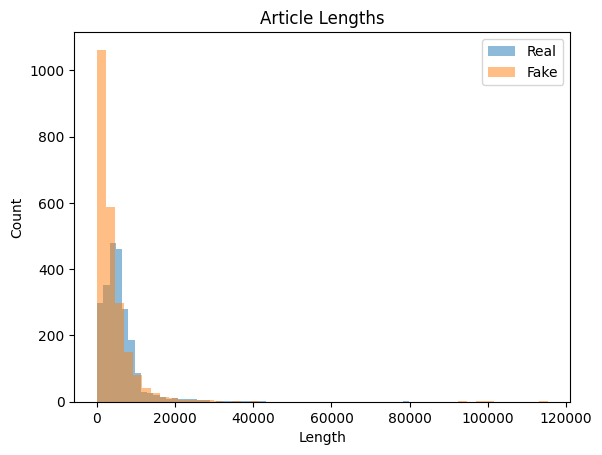

In [6]:
real_lengths = raw_real_iop['text'].apply(len)
fake_lengths = raw_fake_iop['text'].apply(len)

plt.hist(real_lengths, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake')
plt.title('Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

The same happen when we count not just the length but the words:

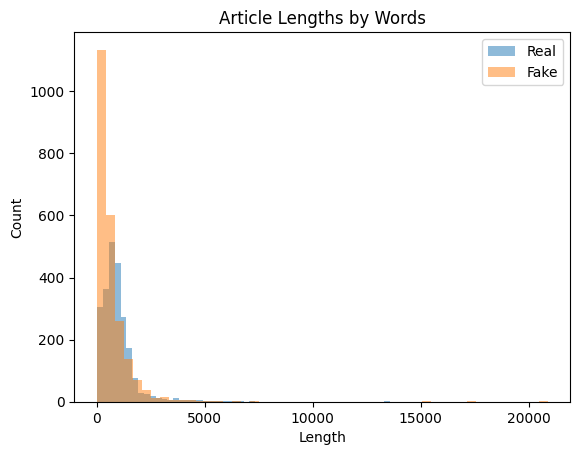

In [7]:
real_lengths_words = raw_real_iop['text'].str.split().apply(len)
fake_lengths_words = raw_fake_iop['text'].str.split().apply(len)

plt.hist(real_lengths_words, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths_words, bins=50, alpha=0.5, label='Fake')
plt.title('Article Lengths by Words')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

Now we are gonna make sure the text for every new has at least one word:

In [8]:
print("Number of words in the real article with least number:", min(raw_real_iop['text'].str.split().apply(len)))

Number of words in the real article with least number: 9


In [9]:
raw_fake_iop["test_number_words"]=raw_fake_iop['text'].str.split().apply(len)

In [10]:
raw_fake_iop_not_zero=raw_fake_iop[raw_fake_iop["test_number_words"]!=0]
len(raw_fake_iop_not_zero)

2272

In terms of average length per word we have:

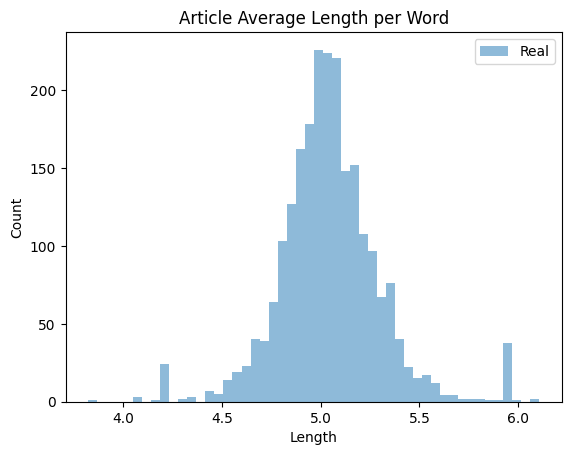

In [11]:
real_lengths_words = raw_real_iop['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
#fake_lengths_words = raw_fake_iop['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

plt.hist(real_lengths_words, bins=50, alpha=0.5, label='Real')
#plt.hist(fake_lengths_words, bins=50, alpha=0.5, label='Fake')
plt.title('Article Average Length per Word')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

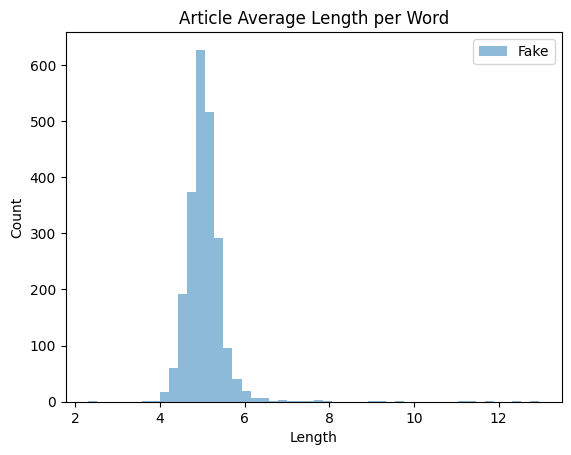

In [12]:
#real_lengths_words = raw_real_iop['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
fake_lengths_words = raw_fake_iop_not_zero['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

#plt.hist(real_lengths_words, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths_words, bins=50, alpha=0.5, label='Fake')
plt.title('Article Average Length per Word')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

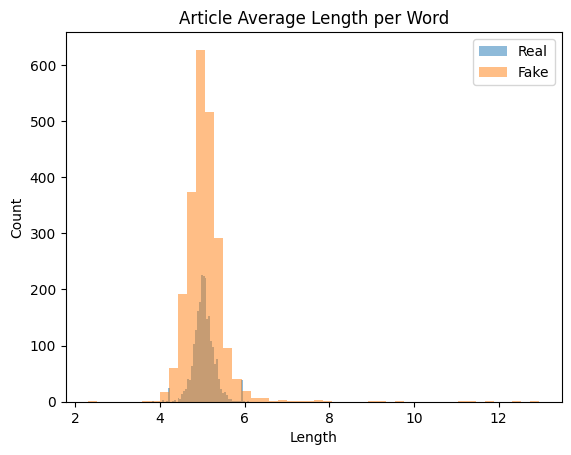

In [13]:
real_lengths_words = raw_real_iop['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
fake_lengths_words = raw_fake_iop_not_zero['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

plt.hist(real_lengths_words, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths_words, bins=50, alpha=0.5, label='Fake')
plt.title('Article Average Length per Word')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

Now in terms of stopwords

In [14]:
from collections import Counter
import nltk
#downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
from nltk.corpus import stopwords
from collections import defaultdict

stop=set(stopwords.words('english'))


def counting_stop_words(series):
  corpus=[]
  new= series.str.split()
  new=new.values.tolist()
  corpus=[word for i in new for word in i]


  dic=defaultdict(int)
  for word in corpus:
      if word in stop:
          dic[word]+=1

  return dic

In [16]:
import string

def pre_process_analysis(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    return text

raw_real_iop["text"]=raw_real_iop['text'].apply(pre_process_analysis)
raw_fake_iop_not_zero["text"]=raw_fake_iop_not_zero['text'].apply(pre_process_analysis)

<ipython-input-16-3912e96b060a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_fake_iop_not_zero["text"]=raw_fake_iop_not_zero['text'].apply(pre_process_analysis)


In [17]:
raw_real_iop

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,update gov fallin vetoed the bill on friday he...,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,ever since texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches",donald trump and hillary clinton now at the st...,REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,a houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",washington fortythree years after the supreme...,REAL
...,...,...,...,...
2292,cXUFKk31t6,VP vetting? Trump meets with Sen. Joni Ernst,donald trump on monday spent part of his july ...,REAL
2293,Eh(RgCq_gz,"Amid campaign troubles, Trump blasts Clinton a...",new york — his campaign in turmoil donald trum...,REAL
2294,0Q6_*BZ^_5,Lewandowski firing: Power of Ivanka?,peggy drexler is the author of our fathers our...,REAL
2295,cFaGIz@3Vb,"In new poll, support for Trump has plunged, gi...",donald trump returns to the campaign trail fro...,REAL


<BarContainer object of 10 artists>

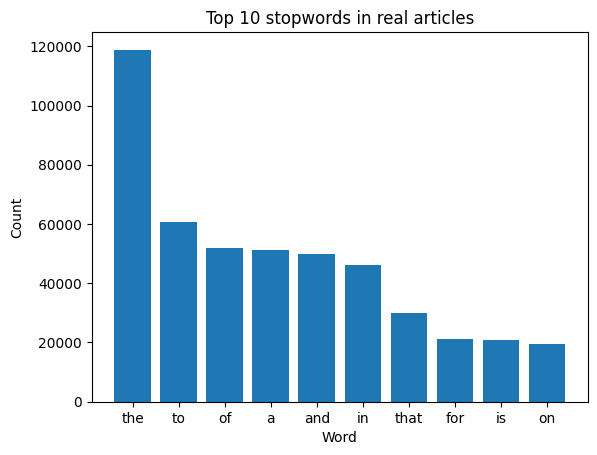

In [18]:
top=sorted(counting_stop_words(raw_real_iop['text']).items(), key=lambda x:x[1],reverse=True)[:10]
plt.title('Top 10 stopwords in real articles')
plt.xlabel('Word')
plt.ylabel('Count')
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

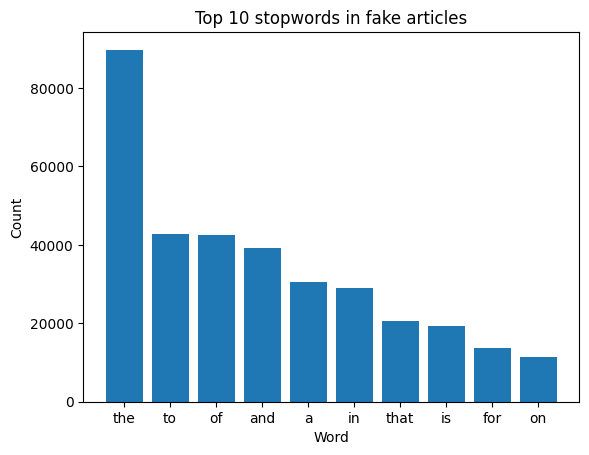

In [19]:
top=sorted(counting_stop_words(raw_fake_iop_not_zero['text']).items(), key=lambda x:x[1],reverse=True)[:10]
plt.title('Top 10 stopwords in fake articles')
plt.xlabel('Word')
plt.ylabel('Count')
x,y=zip(*top)
plt.bar(x,y)

It can be noted that both articles share almost the same top and the same kind of count for each stopword

In [20]:
def generate_corpus(series):
  corpus=[]
  new= series.str.split()
  new=new.values.tolist()
  corpus=[word for i in new for word in i]

  return corpus


In terms of words that are not stop words we have:

<Axes: >

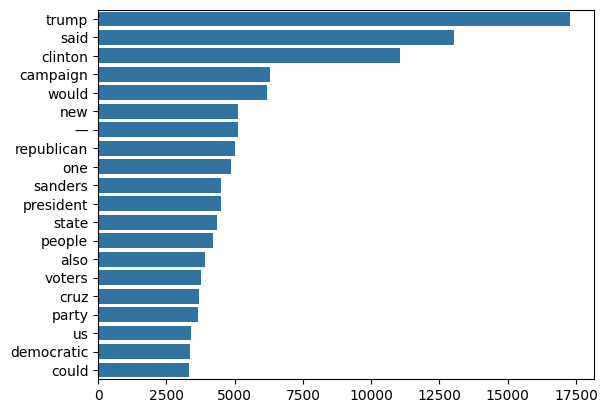

In [21]:
import seaborn as sns
from collections import  Counter

counter=Counter(generate_corpus(raw_real_iop['text']))
most=counter.most_common()

x, y= [], []
i=0
times=0
while times<20:
    word, count = most[i]
    if (word not in stop):
        x.append(word)
        y.append(count)
        times+=1
    i+=1

sns.barplot(x=y,y=x)

<Axes: >

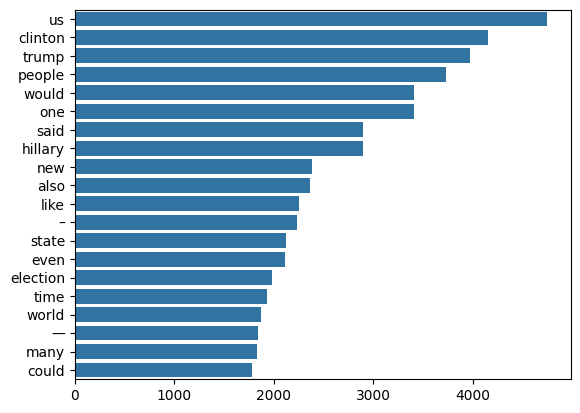

In [22]:
counter=Counter(generate_corpus(raw_fake_iop_not_zero['text']))
most=counter.most_common()

x, y= [], []
i=0
times=0
while times<20:
    word, count = most[i]
    if (word not in stop):
        x.append(word)
        y.append(count)
        times+=1
    i+=1

sns.barplot(x=y,y=x)

### Sentiment analysis

In [54]:
from textblob import TextBlob

def text_blob_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def text_blob_polarity(text):
    return TextBlob(text).sentiment.polarity


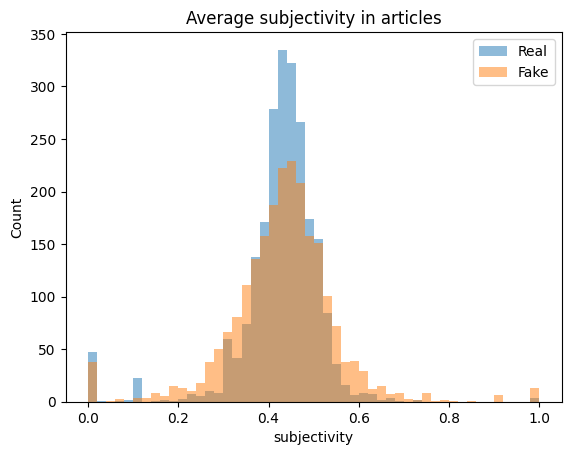

In [55]:
real_lengths_words=raw_real_iop['text'].apply(lambda x : text_blob_subjectivity(x))
fake_lengths_words=raw_fake_iop_not_zero['text'].apply(lambda x : text_blob_subjectivity(x))

plt.hist(real_lengths_words, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths_words, bins=50, alpha=0.5, label='Fake')
plt.title('Average subjectivity in articles')
plt.xlabel('subjectivity')
plt.ylabel('Count')
plt.legend()
plt.show()

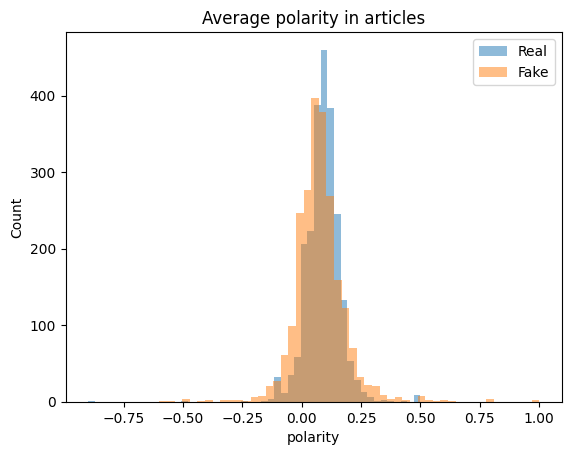

In [56]:
real_lengths_words=raw_real_iop['text'].apply(lambda x : text_blob_polarity(x))
fake_lengths_words=raw_fake_iop_not_zero['text'].apply(lambda x : text_blob_polarity(x))

plt.hist(real_lengths_words, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths_words, bins=50, alpha=0.5, label='Fake')
plt.title('Average polarity in articles')
plt.xlabel('polarity')
plt.ylabel('Count')
plt.legend()
plt.show()

### Testing of hugging-face model to determine neutrality

In [29]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = ["I am not having a great day"]

model_outputs = classifier(sentences)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

[{'label': 'disappointment', 'score': 0.4666951894760132}, {'label': 'sadness', 'score': 0.39849498867988586}, {'label': 'annoyance', 'score': 0.06806593388319016}, {'label': 'neutral', 'score': 0.05703023821115494}, {'label': 'disapproval', 'score': 0.044239308685064316}, {'label': 'nervousness', 'score': 0.014850745908915997}, {'label': 'realization', 'score': 0.014059904962778091}, {'label': 'approval', 'score': 0.0112674655392766}, {'label': 'joy', 'score': 0.006303396541625261}, {'label': 'remorse', 'score': 0.006221492309123278}, {'label': 'caring', 'score': 0.006029403302818537}, {'label': 'embarrassment', 'score': 0.0052654859609901905}, {'label': 'anger', 'score': 0.004981426056474447}, {'label': 'disgust', 'score': 0.004259029403328896}, {'label': 'grief', 'score': 0.0040021371096372604}, {'label': 'confusion', 'score': 0.003382918192073703}, {'label': 'relief', 'score': 0.0031405005138367414}, {'label': 'desire', 'score': 0.00282747158780694}, {'label': 'admiration', 'score'

In [43]:
#Creating the text to make it the analysis possible (up to 514 tokens)

raw_fake_iop_not_zero['text_limit']= raw_fake_iop_not_zero['text'].str.split(n=200).str[:200].str.join(' ')

<ipython-input-43-8ba56af06948>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_fake_iop_not_zero['text_limit']= raw_fake_iop_not_zero['text'].str.split(n=200).str[:200].str.join(' ')


In [44]:
def roberta_analysis(text):
  model_outputs = classifier(text)
  return model_outputs[0][0]["label"]

#real_lengths_words=raw_real_iop['text'].apply(lambda x : text_blob_polarity(x))
fake_lengths_words=raw_fake_iop_not_zero['text_limit'].apply(lambda x : roberta_analysis(x))

In [49]:
fake_lengths_words.value_counts()

text_limit
neutral           1991
gratitude           54
amusement           26
confusion           24
approval            21
admiration          21
optimism            20
disappointment      16
sadness             15
annoyance           13
surprise            12
fear                11
joy                  8
curiosity            7
disapproval          5
excitement           5
realization          5
remorse              5
caring               4
anger                2
desire               2
disgust              2
embarrassment        2
love                 1
Name: count, dtype: int64

In [52]:
fake_lengths_words.to_csv("/content/drive/Shareddrives/Talleres y archivos/Ver+/A3/datasets/roberta_analysis_fake.csv")

In [53]:
fake_lengths_words

2297    neutral
2298    neutral
2299    neutral
2300    neutral
2301    neutral
         ...   
4589    neutral
4590    neutral
4591    neutral
4592    neutral
4593    neutral
Name: text_limit, Length: 2272, dtype: object

## Training

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]

        # Join the words back into a string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
raw_iop_csv["p_text"]=raw_iop_csv['text'].apply(preprocess_text)
raw_iop_csv

,idd,title,text,label,p_text
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL,updat gov fallin veto bill friday head lawmak ...
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL,ever sinc texa law close half state abort clin...
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL,donald trump hillari clinton start line gener ...
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL,houston grand juri investig crimin alleg plan ...
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL,washington fortythre year suprem court establi...
...,...,...,...,...,...
4589,ukZm6JTO#x,Russia Calls the War Party's Bluff,License DMCA \nCold War 2.0 has reached unprec...,FAKE,licens dmca cold war reach unpreced hyster lev...
4590,yu0xKEiapJ,Bernie Sanders: The Democratic primary gave me...,Print \nSen. Bernie Sanders laid out the ways ...,FAKE,print sen berni sander laid way would leverag ...
4591,c4Y370E_9c,"Pipeline Police Strip Search Native Girl, Then...",As the pressure to start construction on the D...,FAKE,pressur start construct dakota access pipelin ...
4592,bBbeuCUeMH,Currency Crisis: Alasdair MacLeod On The Vexed...,Tweet Home » Gold » Gold News » Currency Crisi...,FAKE,tweet home » gold » gold news » currenc crisi ...


In [ ]:
raw_iop_csv["p_label"] = np.where(raw_iop_csv["label"] == 'REAL', 1, 0)
raw_iop_csv

,idd,title,text,label,p_text,p_label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL,updat gov fallin veto bill friday head lawmak ...,1
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL,ever sinc texa law close half state abort clin...,1
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL,donald trump hillari clinton start line gener ...,1
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL,houston grand juri investig crimin alleg plan ...,1
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL,washington fortythre year suprem court establi...,1
...,...,...,...,...,...,...
4589,ukZm6JTO#x,Russia Calls the War Party's Bluff,License DMCA \nCold War 2.0 has reached unprec...,FAKE,licens dmca cold war reach unpreced hyster lev...,0
4590,yu0xKEiapJ,Bernie Sanders: The Democratic primary gave me...,Print \nSen. Bernie Sanders laid out the ways ...,FAKE,print sen berni sander laid way would leverag ...,0
4591,c4Y370E_9c,"Pipeline Police Strip Search Native Girl, Then...",As the pressure to start construction on the D...,FAKE,pressur start construct dakota access pipelin ...,0
4592,bBbeuCUeMH,Currency Crisis: Alasdair MacLeod On The Vexed...,Tweet Home » Gold » Gold News » Currency Crisi...,FAKE,tweet home » gold » gold news » currenc crisi ...,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(raw_iop_csv['p_text'])

y = raw_iop_csv['p_label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9151251360174102
Precision: 0.9334811529933481
Recall: 0.8976545842217484
F1 Score: 0.9152173913043479


In [ ]:
test_text="WASHINGTON—Calling the elaborate heist a surefire way to keep unemployment rates low while combating inflation, Treasury Secretary Janet Yellen unveiled a plan Wednesday to boost the U.S. economy by stealing the largest gem-quality diamond ever found. “The Cullinan Diamond has been behind lock and key in England for years, but thanks to a vulnerability that my team found in their ventilation system, it’s the perfect solution to widespread indicators of suppressed consumer sentiment,” said Yellen, who appeared in an all-black skintight outfit as she described the laser grid system, pressure-activated tiles, and ex-Mossad security force that protect the 3,106-carat gem in the Tower of London. “We sell this baby on the black market, and we knock out our sovereign debt in one fell swoop. I’ve already recruited Johnny Andrizi, the best safecracker in the business, fresh out of a stint in Rikers. We’ve got Haoyu Li, a Chinese contortionist. And then there’s Fed chair Jerome Powell, who specializes in liquidity requirements and economic stress tests. He’s only on hand if shit goes totally off the rails.” At press time, a stunned Yellen had reportedly lifted the glass containing the diamond to find it empty except for an ace of spades, the calling card of Japanese finance minister Shunichi Suzuki."

In [ ]:
pre_test_text=preprocess_text(test_text)
pre_test_text=vectorizer.transform([pre_test_text])
pre_test_text

<1x47113 sparse matrix of type '<class 'numpy.int64'>'
	with 111 stored elements in Compressed Sparse Row format>

In [ ]:
clf.predict_proba(pre_test_text)

array([[0.95777983, 0.04222017]])

In [ ]:
test_text="Columbia University canceled in-person classes, police arrested dozens of protesters at Yale and New York universities, and pro-Palestinian demonstrators set up encampments at other colleges Monday as tensions flared again on campuses across the country over the Israel-Gaza war. Students at many schools are escalating protests over the war, living in tents on campus, disrupting university events, and risking and provoking arrest, leading to a growing sense of chaos and crackdown at colleges in the waning days of the academic year. College leaders are facing intense scrutiny over whether they are doing enough to protect students, faculty and staff against alleged antisemitism and other bias since the Oct. 7 Hamas attack and resulting war — even as they confront scathing criticism from those who say they’re denying students’ right to speak out and censoring political protests. The latest protests — stretching across an array of private and public colleges and universities — come days after more than 100 demonstrators were arrested at Columbia, sparking acts of solidarity at other institutions including Boston University and the University of North Carolina at Chapel Hill. Encampments and other protests also sprang up at campuses such as the Massachusetts Institute of Technology and the University of California at Berkeley. At New York University late Monday, officers from the NYPD made arrests at Gould Plaza after school administrators requested their assistance, according to police spokesperson Shaimaa Alkhafajee, who said she did not know how many people had been arrested. NYU faculty were also among those arrested, according to group NYU Faculty for Justice in Palestine. Videos on social media showed dozens of officers in tense confrontations with protesters. Some officers tossed tents, and others grappled with demonstrators. Videos also showed police loading people, whose hands were zip-tied behind their backs, onto correctional buses. Officers said over a megaphone that protesters were arrested for 'disorderly conduct,' according to the Washington Square News, NYU’s independent student newspaper. NYU spokesman John Beckman said that about 50 protesters were demonstrating 'without authorization' Monday morning and the university blocked access to the plaza to prevent more people joining. The barriers were breached early in the afternoon by additional protesters, 'many of whom we believe were not affiliated with NYU,' who exhibited 'disorderly, disruptive, and antagonizing behavior,' and refused to leave when told the protests would be disbanded, he said. The university then requested assistance from the NYPD, he said, adding there were “several antisemitic incidents reported.' In a letter shared by NYPD deputy commissioner Kaz Daughtry, the university asked the police department to “take enforcement action” up to and including arrests to clear the protesters, all of whom they considered “to be trespassers.” Earlier in the day, Yale said 47 students were arrested at Beinecke Plaza and will be referred for disciplinary action, potentially including suspension. The school said it made repeated efforts over the weekend to talk to protesters, offered them meetings with trustees and warned of arrests before the Monday morning action. Police released the detained protesters. “I was deeply saddened that the call for civil discourse and peaceful protest I issued was not heeded,” Yale President Peter Salovey said in a message to the campus community. “We then became aware of police reports identifying harmful acts and threatening language used against individuals at or near the protest sites,” he said. “Some of the aggressors are believed to be members of the Yale community while others were outsiders. We will not tolerate such behavior nor any open violation of Yale policies that interrupts academic and campus operations.' "

In [ ]:
pre_test_text=preprocess_text(test_text)
pre_test_text=vectorizer.transform([pre_test_text])
pre_test_text

<1x47113 sparse matrix of type '<class 'numpy.int64'>'
	with 224 stored elements in Compressed Sparse Row format>

In [ ]:
clf.predict_proba(pre_test_text)

array([[0.15523581, 0.84476419]])

In [ ]:
test_text="CLAIM: New York Judge Juan M. Merchan told former President Donald Trump on the first day of his hush money case that he can’t attend his son Barron’s May 17 high school graduation because he must be in court that day. THE FACTS: Merchan said on Monday that he was not prepared to rule on a request that court be adjourned on May 17 so that Trump can attend the ceremony. He said his decision will depend on how the trial proceeds. Despite that, Trump said as he left court following the trial’s first day, “it looks like the judge will not let me go to the graduation of my son.” Moments later, he expressed displeasure because the trial made it so “that I can’t go to my son’s graduation” and a number of other events, including a U.S. Supreme Court hearing and campaign stops. Trump then furthered his criticism of the judge on his Truth Social platform, writing in one post both that he “will likely not be allowed to attend” and that “the Judge, Juan Merchan, is preventing me from proudly attending my son’s Graduation.” He wrote in another post less than two hours later that he is “being prohibited from attending.”"

In [ ]:
pre_test_text=preprocess_text(test_text)
pre_test_text=vectorizer.transform([pre_test_text])
pre_test_text

<1x47113 sparse matrix of type '<class 'numpy.int64'>'
	with 73 stored elements in Compressed Sparse Row format>

In [ ]:
clf.predict_proba(pre_test_text)

array([[0.04197878, 0.95802122]])

# LLM Analysis

In [ ]:
KEY=""

In [ ]:
!pip install -U -q google.generativeai

## SE Study

In [ ]:
import google.generativeai as genai

#GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=KEY)

In [ ]:
BOT_PROMPT="""\You are a fact checker system, everytime the user give you a text you are gonna response with links from commonly trusted webs to let the user know more about the text
"""

In [ ]:
# Toggle this to switch between Gemini 1.5 with a system instruction, or Gemini 1.0 Pro.
use_sys_inst = False

model_name = 'gemini-1.5-pro-latest' if use_sys_inst else 'gemini-1.0-pro-latest'

if use_sys_inst:
  model = genai.GenerativeModel(
      model_name, system_instruction=BOT_PROMPT)
  convo = model.start_chat(enable_automatic_function_calling=True)

else:
  model = genai.GenerativeModel(model_name)
  convo = model.start_chat(
      history=[
          {'role': 'user', 'parts': [BOT_PROMPT]},
          {'role': 'model', 'parts': ['OK I understand. I will do my best!']}
        ],
      enable_automatic_function_calling=True)

In [ ]:
convo.send_message(test_text)


response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': '### **Here are some links to commonly trusted websites that you can use to learn more about the protests on college campuses over the Israel-Gaza war:**\n\n* [The New York Times](https://www.nytimes.com/2021/05/17/us/politics/columbia-yale-protests-israel-gaza.html)\n* [The Washington Post](https://www.washingtonpost.com/education/2021/05/17/columbia-yale-protests-israel-gaza/)\n* [The Guardian](https://www.theguardian.com/us-news/2021/may/17/columbia-university-cancels-classes-as-protests-over-israel-gaza-conflict-intensify)\n* [CNN](https://www.cnn.com/2021/05/17/us/columbia-yale-protests-arrests/index.html)\n* [BBC News](https://www.bbc.com/news/world-us-canada-57164734)'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 

## RAG Study

In [ ]:
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
from pypdf import PdfReader

def load_pdf(file_path):
    """
    Reads the text content from a PDF file and returns it as a single string.

    Parameters:
    - file_path (str): The file path to the PDF file.

    Returns:
    - str: The concatenated text content of all pages in the PDF.
    """
    # Logic to read pdf
    reader = PdfReader(file_path)

    # Loop over each page and store it in a variable
    text = ""
    for page in reader.pages:
        text += page.extract_text()

    return text

# replace the path with your file path
pdf_text = load_pdf(file_path="/content/Introduction to Machine Learning with Python ( PDFDrive.com )-min.pdf")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Introduction to Machine Learning with Python ( PDFDrive.com )-min.pdf'

In [ ]:
import re

def split_text(text: str):
    """
    Splits a text string into a list of non-empty substrings based on the specified pattern.
    The "\n \n" pattern will split the document para by para
    Parameters:
    - text (str): The input text to be split.

    Returns:
    - List[str]: A list containing non-empty substrings obtained by splitting the input text.

    """
    split_text = re.split('\n \n', text)
    return [i for i in split_text if i != ""]

chunked_text = split_text(text=pdf_text)

In [ ]:
!pip install chromadb

In [ ]:
import google.generativeai as genai
from chromadb import Documents, EmbeddingFunction, Embeddings
import os

class GeminiEmbeddingFunction(EmbeddingFunction):
    """
    Custom embedding function using the Gemini AI API for document retrieval.

    This class extends the EmbeddingFunction class and implements the __call__ method
    to generate embeddings for a given set of documents using the Gemini AI API.

    Parameters:
    - input (Documents): A collection of documents to be embedded.

    Returns:
    - Embeddings: Embeddings generated for the input documents.
    """
    def __call__(self, input: Documents) -> Embeddings:
        gemini_api_key = KEY
        if not gemini_api_key:
            raise ValueError("Gemini API Key not provided. Please provide GEMINI_API_KEY as an environment variable")
        genai.configure(api_key=gemini_api_key)
        model = "models/embedding-001"
        title = "Custom query"
        return genai.embed_content(model=model,
                                   content=input,
                                   task_type="retrieval_document",
                                   title=title)["embedding"]

In [ ]:
import chromadb
from typing import List
def create_chroma_db(documents:List, path:str, name:str):
    """
    Creates a Chroma database using the provided documents, path, and collection name.

    Parameters:
    - documents: An iterable of documents to be added to the Chroma database.
    - path (str): The path where the Chroma database will be stored.
    - name (str): The name of the collection within the Chroma database.

    Returns:
    - Tuple[chromadb.Collection, str]: A tuple containing the created Chroma Collection and its name.
    """
    chroma_client = chromadb.PersistentClient(path=path)
    db = chroma_client.create_collection(name=name, embedding_function=GeminiEmbeddingFunction())

    for i, d in enumerate(documents):
        db.add(documents=d, ids=str(i))

    return db, name

db,name =create_chroma_db(documents=chunked_text,
                          path="/content", #replace with your path
                          name="rag_experiment")

In [ ]:
def load_chroma_collection(path, name):
    """
    Loads an existing Chroma collection from the specified path with the given name.

    Parameters:
    - path (str): The path where the Chroma database is stored.
    - name (str): The name of the collection within the Chroma database.

    Returns:
    - chromadb.Collection: The loaded Chroma Collection.
    """
    chroma_client = chromadb.PersistentClient(path=path)
    db = chroma_client.get_collection(name=name, embedding_function=GeminiEmbeddingFunction())

    return db

db=load_chroma_collection(path="/content", name="rag_experiment")

In [ ]:
def get_relevant_passage(query, db, n_results):
  passage = db.query(query_texts=[query], n_results=n_results)['documents'][0]
  return passage

#Example usage
relevant_text = get_relevant_passage(query="Classification models",db=db,n_results=3)

In [ ]:
relevant_text

In [ ]:
def make_rag_prompt(query, relevant_passage):
  escaped = relevant_passage.replace("'", "").replace('"', "").replace("\n", " ")
  prompt = ("""You are a helpful and informative bot that answers questions using text from the reference passage included below. \
  Be sure to respond in a complete sentence, being comprehensive, including all relevant background information. \
  However, you are talking to a non-technical audience, so be sure to break down complicated concepts and \
  strike a friendly and converstional tone. \
  If the passage is irrelevant to the answer, you may ignore it.
  QUESTION: '{query}'
  PASSAGE: '{relevant_passage}'

  ANSWER:
  """).format(query=query, relevant_passage=escaped)

  return prompt

In [ ]:
import google.generativeai as genai
def generate_answer(prompt):
    gemini_api_key = KEY
    if not gemini_api_key:
        raise ValueError("Gemini API Key not provided. Please provide GEMINI_API_KEY as an environment variable")

    use_sys_inst = False

    model_name = 'gemini-1.5-pro-latest' if use_sys_inst else 'gemini-1.0-pro-latest'

    if use_sys_inst:
      model = genai.GenerativeModel(
          model_name, system_instruction=prompt)
      convo = model.start_chat(enable_automatic_function_calling=True)

    else:
      model = genai.GenerativeModel(model_name)
      convo = model.start_chat(
          history=[
              {'role': 'user', 'parts': [prompt]},
              {'role': 'model', 'parts': ['OK I understand. I will do my best!']}
            ],
          enable_automatic_function_calling=True)


    #answer = model.generate_content(prompt)
    return convo.send_message(prompt) #answer.text

In [ ]:
def give_answer(db,query):
    #retrieve top 3 relevant text chunks
    relevant_text = get_relevant_passage(query,db,n_results=3)
    prompt = make_rag_prompt(query,
                             relevant_passage="".join(relevant_text)) # joining the relevant chunks to create a single passage
    answer = generate_answer(prompt)

    return answer

answer = give_answer(db,query="What is the difference between a classification model and a clustering model")
print(answer)